In [1]:
import pandas as pd
import numpy as np
import pickle

df = pd.read_csv('titanic (1).csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,?,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,?,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,?,S


In [4]:
df = df.replace('?', np.nan)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
# Retrieve only crucial columns
df = df.iloc[:,[1,2,4,5,6,7,9,11]]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [6]:
# Collecting rows with valid ages to find the average
agedf = df.loc[df.Age.notnull()]
agedf['Age'] = agedf.Age.astype('float64')
agedf.head()

/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
# Computing average age
average_age = agedf.Age.mean()
print(round(average_age))

30


In [8]:
# Fill NaN with average age
df = df.fillna(average_age)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [10]:
# Rounding fare
df.Fare = df.Fare.astype('int64')

In [11]:
df["title"] = df["Pclass"].map(str) + ' ' + df["Sex"].map(str) + ' ' + df["Age"].map(str) + ' ' + df["SibSp"].map(str) + ' ' + df["Parch"].map(str) + ' ' + df["Fare"].map(str)+ ' ' + df["Embarked"].map(str)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22,1,0,7,S,3 male 22 1 0 7 S
1,1,1,female,38,1,0,71,C,1 female 38 1 0 71 C
2,1,3,female,26,0,0,7,S,3 female 26 0 0 7 S
3,1,1,female,35,1,0,53,S,1 female 35 1 0 53 S
4,0,3,male,35,0,0,8,S,3 male 35 0 0 8 S


/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 477 samples, validate on 235 samples
Epoch 1/20
477/477 [==============================] - 0s 603us/step - loss: 0.6293 - acc: 0.6310 - val_loss: 0.5800 - val_acc: 0.6553
Epoch 2/20
477/477 [==============================] - 0s 52us/step - loss: 0.5384 - acc: 0.7820 - val_loss: 0.5131 - val_acc: 0.7660
Epoch 3/20
477/477 [==============================] - 0s 46us/step - loss: 0.4789 - acc: 0.7966 - val_loss: 0.4740 - val_acc: 0.7787
Epoch 4/20
477/477 [==============================] - 0s 49us/step - loss: 0.4492 - acc: 0.7966 - val_loss: 0.4553 - val_acc: 0.7830
Epoch 5/20
477/477 [==============================] - 0s 52us/step - loss: 0.4189 - acc: 0.8302 - val_loss: 0.4469 - val_acc: 0.7830
Epoch 6/20
477/477 [==============================] -

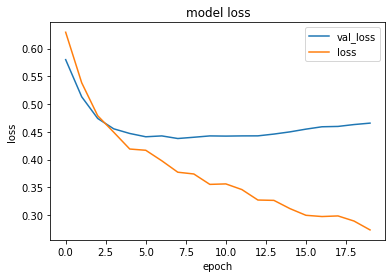

In [13]:
#import pandas as pd
#import numpy as np
from numpy import dstack
import logging
import itertools
import os
import gensim
import re

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras.utils import to_categorical
from keras.models import Sequential, model_from_json, load_model
from keras.layers import Dense, Activation, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.corpus import stopwords



df = df.sample(frac=1).reset_index(drop=True)
train_size = int(len(df) * 0.8) 
train_title = df['title'][:train_size] 
train_Category = df['Survived'][:train_size]



eval_title = df['title'][train_size:] 
eval_Category = df['Survived'][train_size:] 

max_words = 100
tokenize = Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_title) # only fit on train

x_train = tokenize.texts_to_matrix(train_title)
x_eval = tokenize.texts_to_matrix(eval_title)

encoder = LabelEncoder()
encoder.fit(train_Category)

y_train = train_Category
y_eval = eval_Category


num_classes = np.max(y_train) - np.min(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)  
y_eval = utils.to_categorical(y_eval, num_classes)

batch_size = 50
epochs = 20

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.33)

def display_training_graph(history):
    # summarize history for loss
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'loss'], loc='upper right')
    plt.draw()


display_training_graph(history)

In [14]:
#Evaluation
evaluation_score = model.evaluate(x_eval, y_eval,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', evaluation_score[1])

179/179 [==============================] - 0s 23us/step
Test accuracy: 0.804469288061451


In [17]:
# Saving model
pickle.dump(model, open('model.pkl','wb'))

# Saving Tokenizer
with open('tokenize.pkl', 'wb') as handle:
    pickle.dump(tokenize, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
# Load model
loaded_model = pickle.load(open('model.pkl', 'rb'))

# Load Tokenizer
with open('tokenize.pkl', 'rb') as handle:
    tokenize = pickle.load(handle)


index_list = tokenize.texts_to_matrix(["3 male 22.0 1 0 7.25 S"])
print(index_list)
result = loaded_model.predict(np.array([index_list[0]]))[0]
print(result)

[[0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
[0.8224976  0.17750236]
